Navie Bayes Algorithm

In [4]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB

In [5]:
#Load the dataset
data=pd.read_csv('/content/ecosystem_data.csv')
data.head()

,water_quality,air_quality_index,biodiversity_index,vegetation_cover,soil_ph,ecosystem_health
0,37.454012,112.092246,0.729998,63.814457,5.144016,degraded
1,95.071431,99.873629,0.184512,45.929245,4.021498,degraded
2,73.199394,52.846174,0.346640,96.449852,4.194976,degraded
3,59.865848,182.180001,0.663281,21.897845,4.493691,degraded
4,15.601864,142.987248,0.482089,58.785642,4.620093,degraded


In [6]:
data.columns

Index(['water_quality', 'air_quality_index', 'biodiversity_index',
       'vegetation_cover', 'soil_ph', 'ecosystem_health'],
      dtype='object')

In [7]:
data['ecosystem_health'].unique()

array(['degraded', 'at risk', 'healthy'], dtype=object)

In [8]:
data['ecosystem_health'].nunique()

3

In [9]:
data['ecosystem_health'] = data['ecosystem_health'].map({'healthy': 0, 'at risk': 1, 'degraded':2})

In [10]:
data

,water_quality,air_quality_index,biodiversity_index,vegetation_cover,soil_ph,ecosystem_health
0,37.454012,112.092246,0.729998,63.814457,5.144016,2
1,95.071431,99.873629,0.184512,45.929245,4.021498,2
2,73.199394,52.846174,0.346640,96.449852,4.194976,2
3,59.865848,182.180001,0.663281,21.897845,4.493691,2
4,15.601864,142.987248,0.482089,58.785642,4.620093,2
...,...,...,...,...,...,...
9995,85.765599,263.111589,0.952275,75.403391,6.923449,2
9996,89.750884,14.044187,0.747824,76.452694,4.744065,1
9997,94.670792,91.109541,0.019456,26.956943,7.619473,2
9998,39.748799,132.996002,0.401005,43.431977,6.365560,2


In [11]:
#Feature Selection
X = data[['water_quality', 'air_quality_index', 'biodiversity_index',
       'vegetation_cover', 'soil_ph']]
y = data['ecosystem_health']

In [12]:
#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
#model selection
model = GaussianNB()
#Training
model.fit(X_train, y_train)

GaussianNB()

In [14]:
#Predict
y_pred = model.predict(X_test)
y_pred


array([2, 2, 1, ..., 2, 2, 2])

In [15]:
#Metrics
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9515


In [16]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[   6   15    0]
 [   1  140   81]
 [   0    0 1757]]


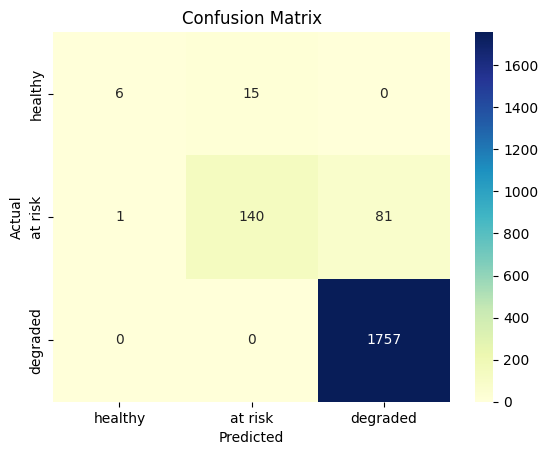

In [17]:
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',xticklabels=['healthy','at risk','degraded'],yticklabels=['healthy','at risk','degraded'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [18]:
print(classification_report(y_test, y_pred, target_names=['healthy','at risk','degraded']))

              precision    recall  f1-score   support

     healthy       0.86      0.29      0.43        21
     at risk       0.90      0.63      0.74       222
    degraded       0.96      1.00      0.98      1757

    accuracy                           0.95      2000
   macro avg       0.91      0.64      0.72      2000
weighted avg       0.95      0.95      0.95      2000



K-Means Clustering


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [20]:
#Load dataset
df = pd.read_csv('/content/environmental factors.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/environmental factors.csv'

In [ ]:
#Standardization- StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

print(pd.DataFrame(df_scaled, columns = df.columns).head(10))

In [ ]:
#Elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
k = 7
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)
print(df.head())

In [ ]:
#Metrics
sil_score = silhouette_score(df_scaled, df['Cluster'])
print("Silhouette Score:", sil_score)

In [ ]:
#Plot
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carbon_emissions', y='pollution_level', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7, edgecolor='k')
plt.title('K-Means Clustering Results')
plt.xlabel('Carbon Emissions')
plt.ylabel('Pollution Level')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Cluster')
plt.show()

Hierarchial Clustering

In [ ]:
#Importing libs
import pandas as pd
import numpy as np

In [ ]:

#Load the data
df1 = pd.read_csv('/content/environmental_socioeconomic.csv')
df1.head()

In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1)
print(pd.DataFrame(df1_scaled, columns = df1.columns).head(10))

In [ ]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram = shc.dendrogram(shc.linkage(df1_scaled, method='ward'))
plt.xlabel('Index')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')
df1['Cluster'] = hc.fit_predict(df1_scaled)

In [ ]:
df1.head()

PCA -Principal Component Analysis

In [21]:
import pandas as pd
import numpy as np



In [23]:
pcadf = pd.read_csv('/content/climate data.csv')
pcadf.head()

,temperature,precipitation,humidity,co2_levels,wind_speed,sea_level_rise
0,17.483571,981.882760,40.290589,429.955082,7.747558,2.257752
1,14.308678,654.528792,50.808133,338.392099,1.635120,3.027678
2,18.238443,607.711318,88.206106,405.580543,7.408273,2.956763
3,22.615149,641.413967,76.847271,353.561850,2.255336,3.169446
4,13.829233,1374.304042,46.955450,330.552974,6.331719,2.627995


In [26]:
#Standardization
scaler_pca = StandardScaler()
pcadf_scaled = scaler_pca.fit_transform(pcadf)
print(pd.DataFrame(pcadf_scaled, columns = pcadf.columns))
print(pcadf_scaled)

      temperature  precipitation  humidity  co2_levels  wind_speed  \
0        0.497154      -0.642090 -1.133148    0.606334    0.057360   
1       -0.135665      -1.395950 -0.522296   -1.200923   -1.357867   
2        0.647615      -1.503765  1.649752    0.125233   -0.021196   
3        1.519979      -1.426152  0.990039   -0.901505   -1.214267   
4       -0.231228       0.261613 -0.746058   -1.355650   -0.270453   
...           ...            ...       ...         ...         ...   
9995     1.298806       0.607283 -0.406769    0.451671    1.549991   
9996    -1.989421       1.184066  0.335375   -0.162233   -0.002774   
9997    -0.700790      -1.006631  0.609912   -0.101701   -0.006296   
9998     0.496208       0.852156  0.517444    0.510114    0.955691   
9999     0.644326       1.292683  1.277454    2.428963    0.889392   

      sea_level_rise  
0          -0.747935  
1           0.026025  
2          -0.045261  
3           0.168535  
4          -0.375752  
...              ... 

In [29]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(pcadf_scaled)
print('Explained Principal Component Variance Ratio')
print(pca.explained_variance_ratio_)
print('Cumulitive  Variance Ratio')
print(np.sum(pca.explained_variance_ratio_))

Explained Principal Component Variance Ratio
[0.17112476 0.1687199  0.16748355 0.16615896 0.16522781 0.16128503]
Cumulitive  Variance Ratio
1.0


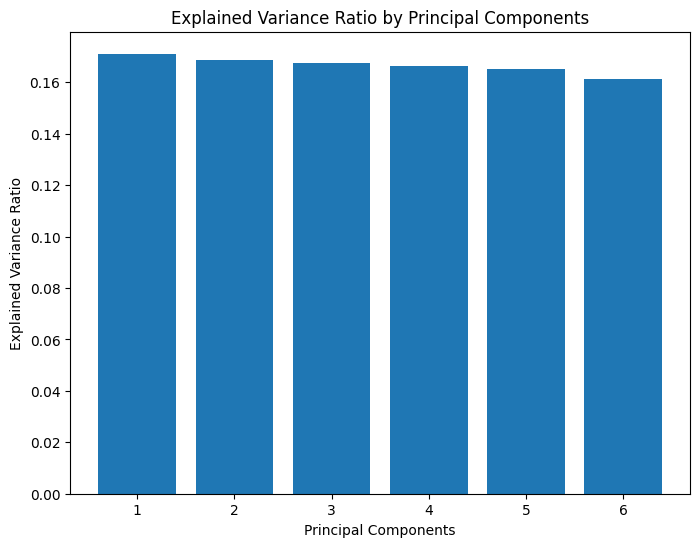

In [30]:
plt.figure(figsize=(8,6))
plt.bar(range(1,len(pca.explained_variance_ratio_) +1), pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

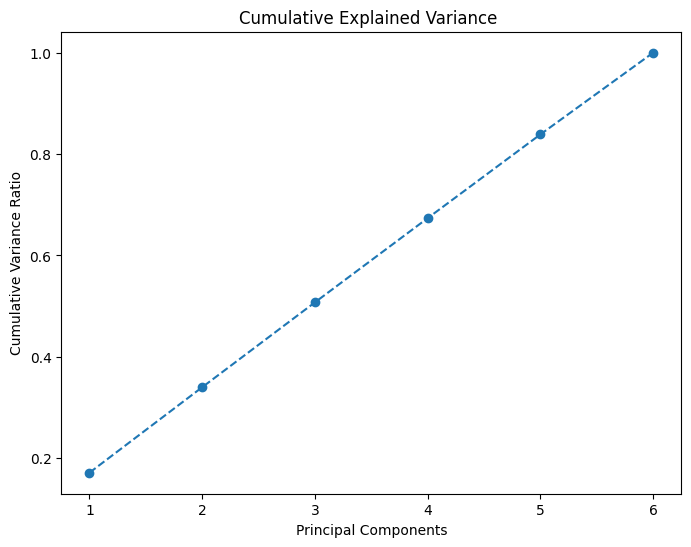

In [36]:
plt.figure(figsize=(8,6))
plt.plot(range(1,len(pca.explained_variance_ratio_) +1), np.cumsum(pca.explained_variance_ratio_), marker ='o', linestyle = '--')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.title('Cumulative Explained Variance ')
plt.show()

In [41]:
=pca.transform(df_pca_scaled)
pca_df=pd.DataFrame(data_pca[:,:2],columns=['PC1','PC2'])
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1',y='PC2',data=pca_df,s=100,alpha=0.7,edgecolor='k')
plt.title('principal component analysis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
pca_df.head()

NameError: name 'df_pca_scaled' is not defined

t-SNE non linear

In [50]:
data = pd.read_csv('/content/climate data.csv')
data.head()

,temperature,precipitation,humidity,co2_levels,wind_speed,sea_level_rise
0,17.483571,981.882760,40.290589,429.955082,7.747558,2.257752
1,14.308678,654.528792,50.808133,338.392099,1.635120,3.027678
2,18.238443,607.711318,88.206106,405.580543,7.408273,2.956763
3,22.615149,641.413967,76.847271,353.561850,2.255336,3.169446
4,13.829233,1374.304042,46.955450,330.552974,6.331719,2.627995


In [51]:
#Standardization- StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data)
data

,temperature,precipitation,humidity,co2_levels,wind_speed,sea_level_rise
0,17.483571,981.882760,40.290589,429.955082,7.747558,2.257752
1,14.308678,654.528792,50.808133,338.392099,1.635120,3.027678
2,18.238443,607.711318,88.206106,405.580543,7.408273,2.956763
3,22.615149,641.413967,76.847271,353.561850,2.255336,3.169446
4,13.829233,1374.304042,46.955450,330.552974,6.331719,2.627995
...,...,...,...,...,...,...
9995,21.505510,1524.406697,52.797263,422.119236,14.194309,2.734895
9996,5.008275,1774.867153,65.575385,391.016348,7.487838,2.362891
9997,11.473416,823.585236,70.302313,394.083183,7.472625,4.229241
9998,17.478828,1630.739393,68.710204,425.080224,11.627498,1.638339


In [45]:
print(pd.DataFrame(df_scaled, columns = data.columns))

      energy_efficiency  co2_emissions  electric_vehicle_penetration  \
0             -0.415900      -0.452465                      0.801884   
1              1.587377      -0.593258                     -1.100359   
2              0.826917      -1.135149                     -0.534981   
3              0.363328       0.355146                      0.569224   
4             -1.175669      -0.096466                     -0.062635   
...                 ...            ...                           ...   
9995           1.263827       1.287710                      1.577019   
9996           1.402389      -1.582259                      0.864048   
9997           1.573448      -0.694246                     -1.675950   
9998          -0.336114      -0.211594                     -0.345396   
9999          -0.963157      -1.148593                     -0.846188   

      cost_efficiency  public_transport_usage  
0            0.482494               -0.684316  
1           -0.136414               -1.

In [52]:
from sklearn.manifold import TSNE
tnse = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
df_tsne = tnse.fit_transform(df_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [53]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 't-SNE 1', y = 't-SNE 2', data = df_tsne, s = 100, alpha = 0.7, edgecolor = 'k')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization')
plt.show()

TypeError: Data source must be a DataFrame or Mapping, not <class 'numpy.ndarray'>.

<Figure size 1000x800 with 0 Axes>